<a href="https://colab.research.google.com/github/22tanyabansal/Data-Science-ML/blob/main/Covid_19_Data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [37]:
df = pd.DataFrame()
df=pd.read_csv("/covid19.csv")
df.head(4)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0


In [30]:
df.drop(['Province/State'],axis=1,inplace=True)

In [31]:
df.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,Albania,41.1533,20.1683,1/22/20,0,0,0
2,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [33]:
df.rename(columns={"Country/Region":"Country"},inplace=True)
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,Albania,41.1533,20.1683,1/22/20,0,0,0
2,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [38]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered
count,31535.000000,31535.000000,3.153500e+04,31535.000000,31535.000000
mean,21.181891,22.881195,4.809217e+03,320.232218,1439.529761
std,24.904267,70.245542,4.314993e+04,2982.791704,10408.836504
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000
25%,6.877000,-15.310100,0.000000e+00,0.000000,0.000000
50%,23.634500,21.005900,1.900000e+01,0.000000,1.000000
75%,41.153300,78.000000,4.370000e+02,6.000000,102.000000
max,71.706900,178.065000,1.528568e+06,91921.000000,289392.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31535 entries, 0 to 31534
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  9520 non-null   object 
 1   Country/Region  31535 non-null  object 
 2   Lat             31535 non-null  float64
 3   Long            31535 non-null  float64
 4   Date            31535 non-null  object 
 5   Confirmed       31535 non-null  int64  
 6   Deaths          31535 non-null  int64  
 7   Recovered       31535 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1.9+ MB


In [43]:
df.fillna('NA')

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NA,Afghanistan,33.000000,65.000000,1/22/20,0,0,0
1,NA,Albania,41.153300,20.168300,1/22/20,0,0,0
2,NA,Algeria,28.033900,1.659600,1/22/20,0,0,0
3,NA,Andorra,42.506300,1.521800,1/22/20,0,0,0
4,NA,Angola,-11.202700,17.873900,1/22/20,0,0,0
...,...,...,...,...,...,...,...,...
31530,NA,Sao Tome and Principe,0.186360,6.613081,5/19/20,251,8,4
31531,NA,Yemen,15.552727,48.516388,5/19/20,167,28,5
31532,NA,Comoros,-11.645500,43.333300,5/19/20,11,1,3
31533,NA,Tajikistan,38.861034,71.276093,5/19/20,1936,41,641


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31535 entries, 0 to 31534
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  31535 non-null  object 
 1   Country/Region  31535 non-null  object 
 2   Lat             31535 non-null  float64
 3   Long            31535 non-null  float64
 4   Date            31535 non-null  object 
 5   Confirmed       31535 non-null  int64  
 6   Deaths          31535 non-null  int64  
 7   Recovered       31535 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1.9+ MB


In [47]:
df2= df.groupby('Country/Region')[['Country/Region','Confirmed','Deaths','Recovered']].sum().reset_index()

In [48]:
df2

,Country/Region,Confirmed,Deaths,Recovered
0,Afghanistan,115615,3211,13641
1,Albania,34319,1408,20212
2,Algeria,183263,19089,76184
3,Andorra,36237,1862,16176
4,Angola,1452,106,383
...,...,...,...,...
183,West Bank and Gaza,17029,95,6333
184,Western Sahara,256,0,144
185,Yemen,1190,190,30
186,Zambia,8987,166,3102


In [54]:
df3 = df2[df2['Confirmed']>2000]

In [55]:
df3

,Country/Region,Confirmed,Deaths,Recovered
0,Afghanistan,115615,3211,13641
1,Albania,34319,1408,20212
2,Algeria,183263,19089,76184
3,Andorra,36237,1862,16176
6,Argentina,203394,9507,57061
...,...,...,...,...
180,Uzbekistan,82572,353,44203
181,Venezuela,16454,467,7071
182,Vietnam,16260,0,10439
183,West Bank and Gaza,17029,95,6333


In [56]:
imputer = SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [59]:
df3= df2.groupby(['Country/Region','Date'])[['Confirmed','Deaths','Recovered']].sum().reset_index()

In [60]:
df3

,Country/Region,Date,Confirmed,Deaths,Recovered
0,Afghanistan,02/01/2020,0,0,0
1,Afghanistan,02/02/2020,0,0,0
2,Afghanistan,02/03/2020,0,0,0
3,Afghanistan,02/04/2020,0,0,0
4,Afghanistan,02/05/2020,0,0,0
...,...,...,...,...,...
22367,Zimbabwe,5/15/20,42,4,13
22368,Zimbabwe,5/16/20,42,4,13
22369,Zimbabwe,5/17/20,44,4,17
22370,Zimbabwe,5/18/20,46,4,18


In [62]:
total_countries=df3['Country/Region'].unique()
len(total_countries)

188

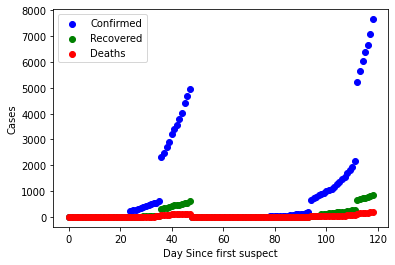

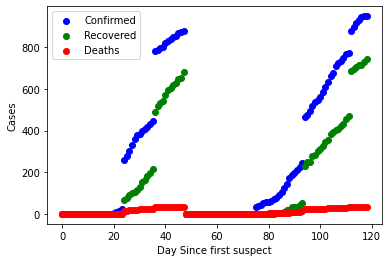

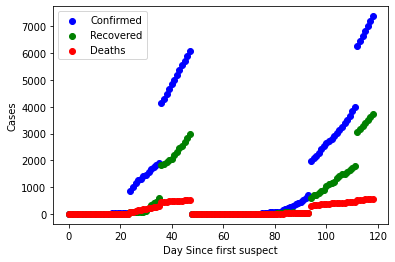

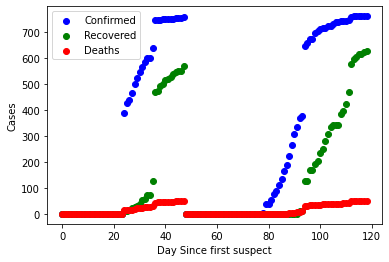

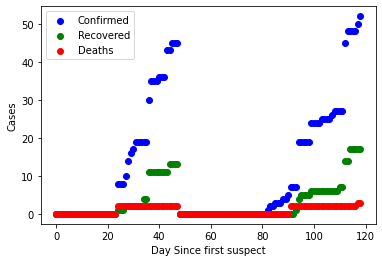

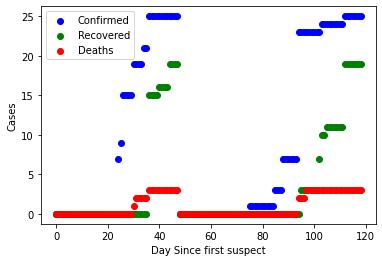

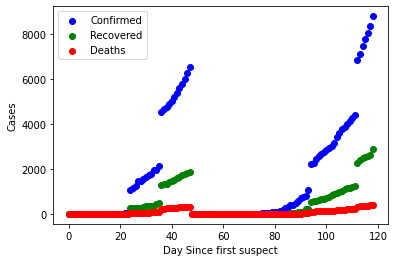

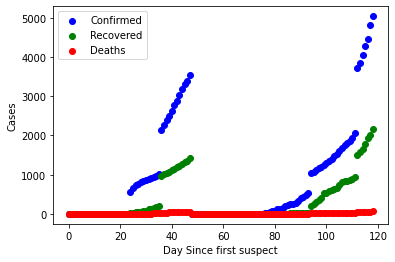

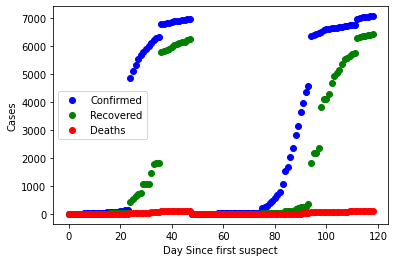

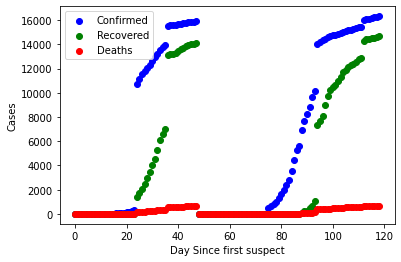

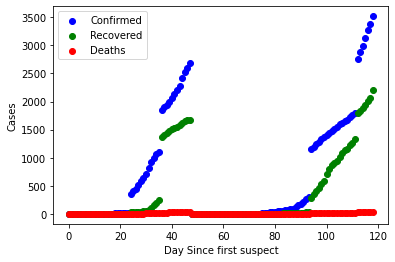

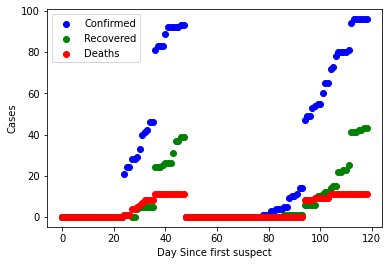

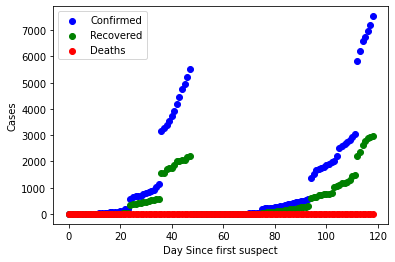

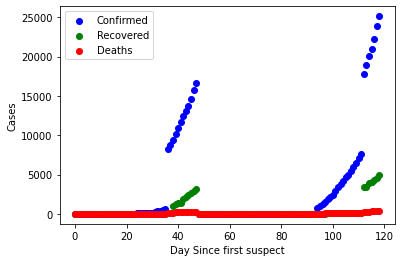

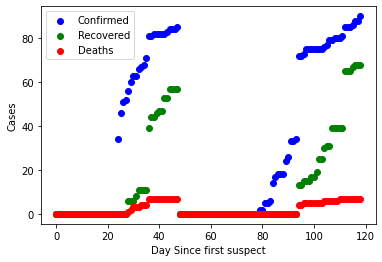

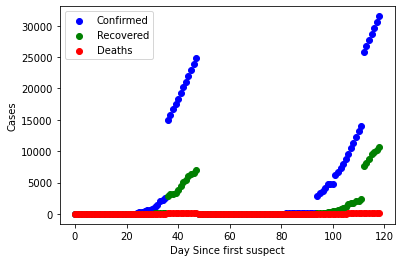

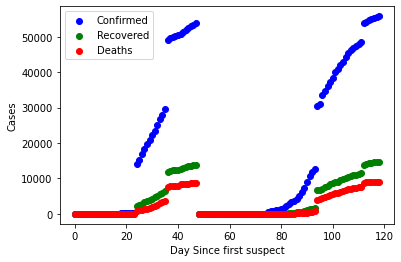

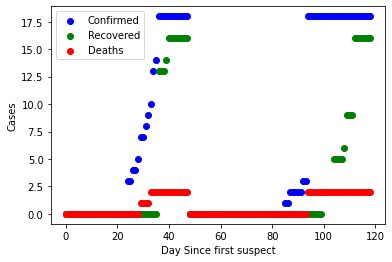

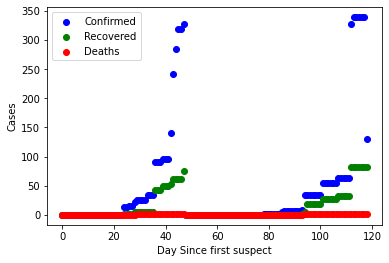

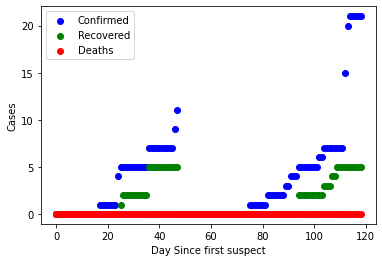

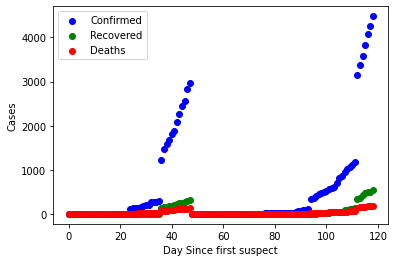

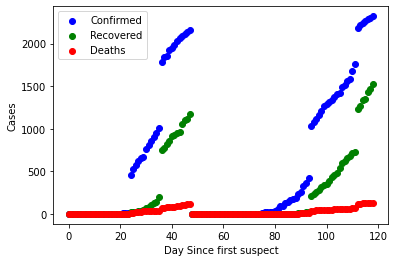

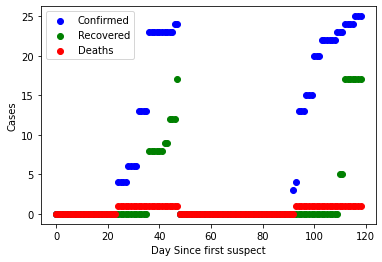

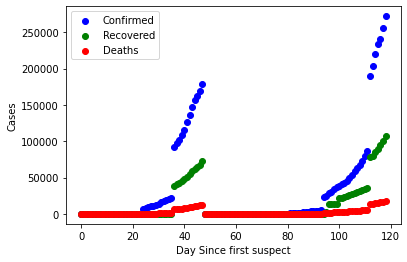

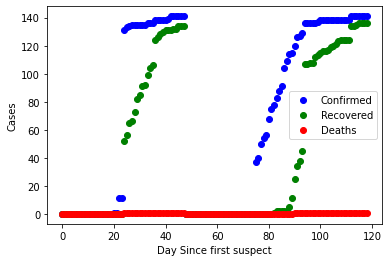

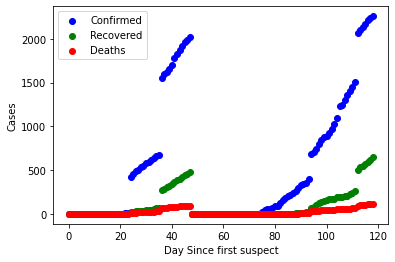

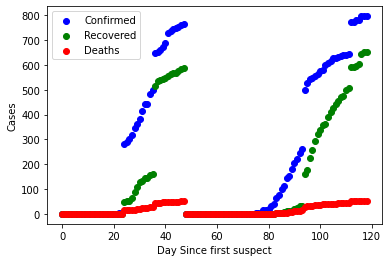

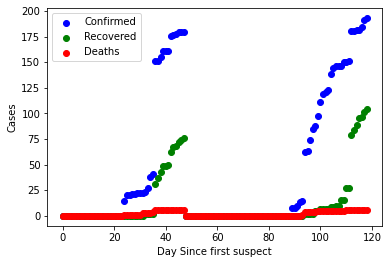

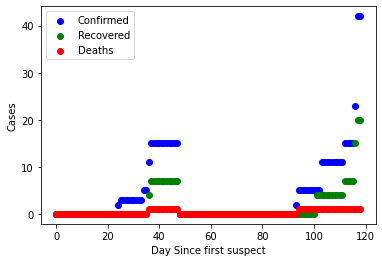

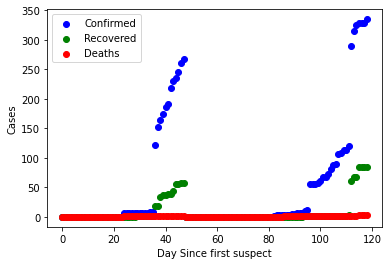

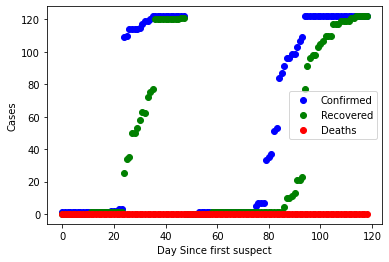

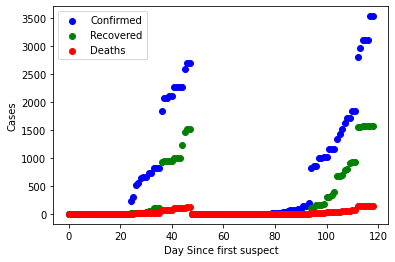

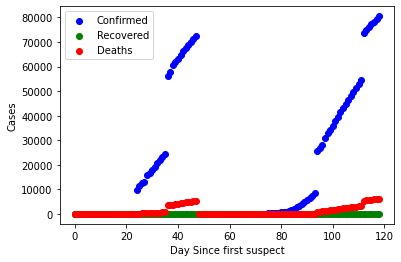

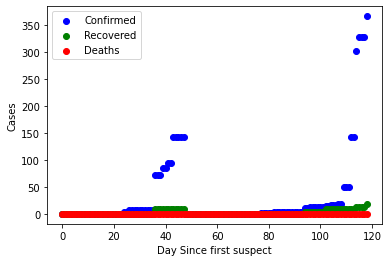

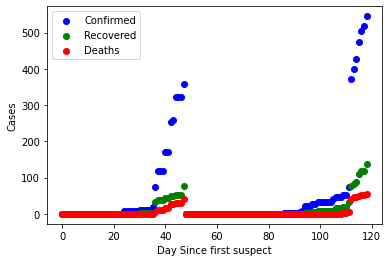

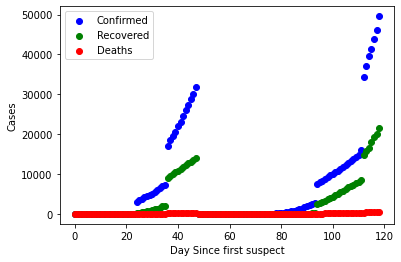

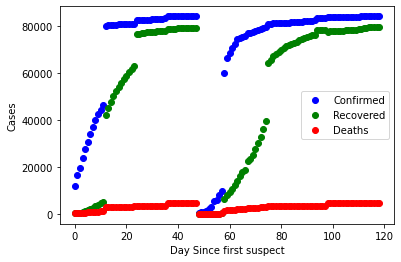

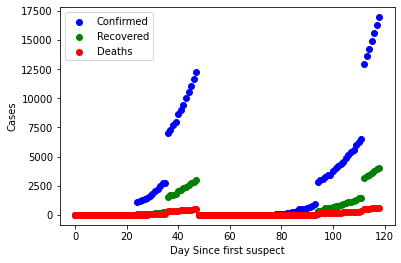

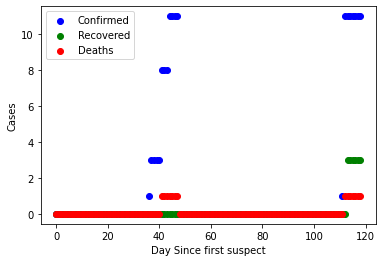

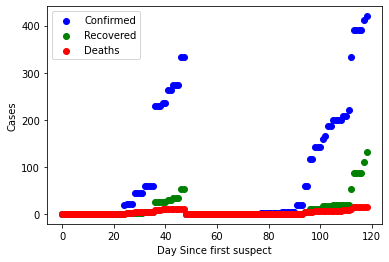

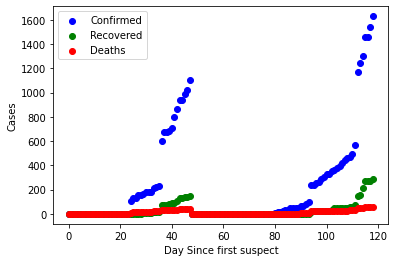

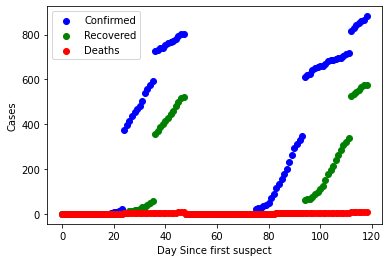

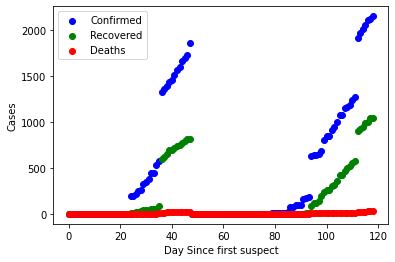

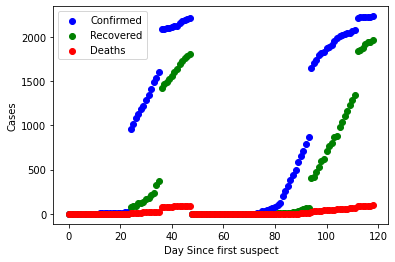

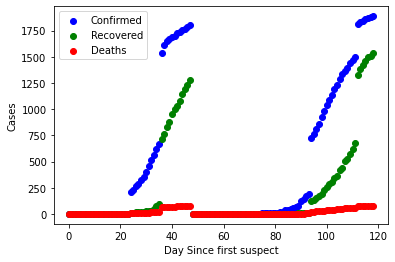

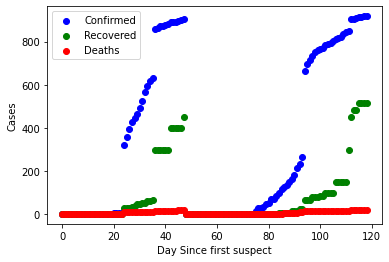

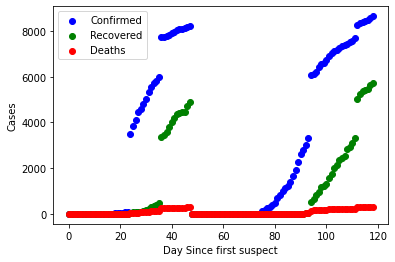

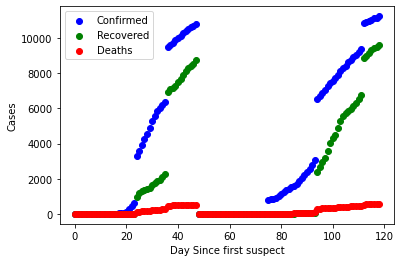

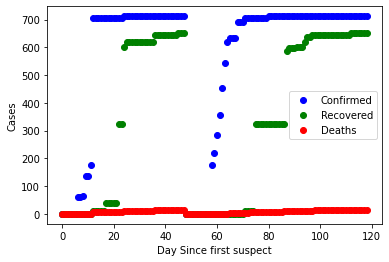

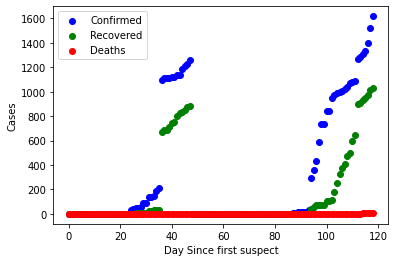

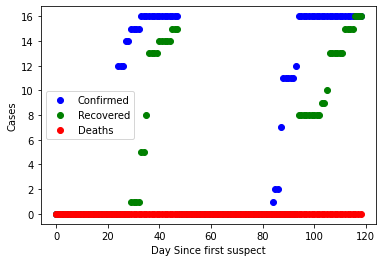

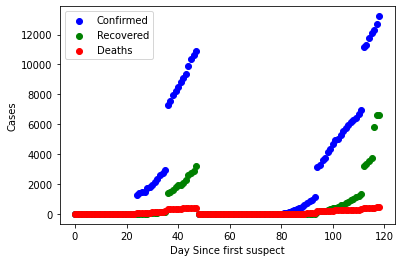

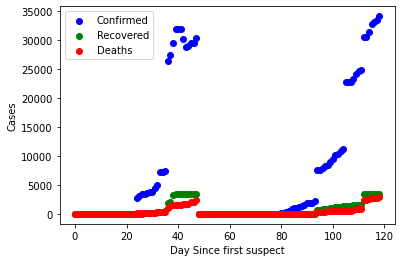

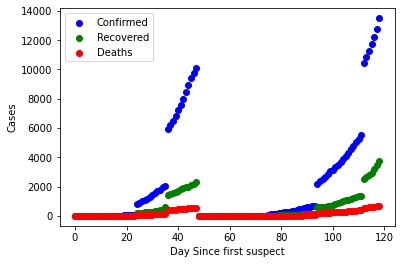

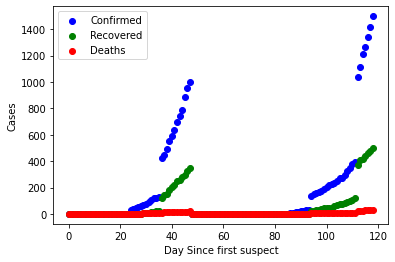

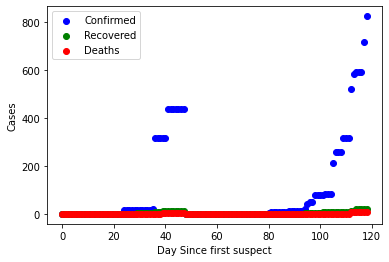

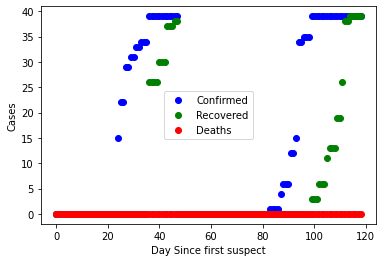

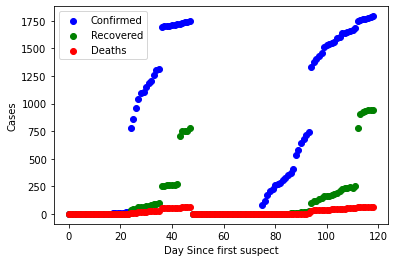

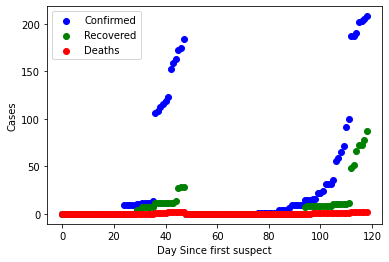

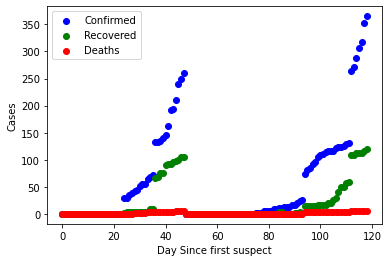

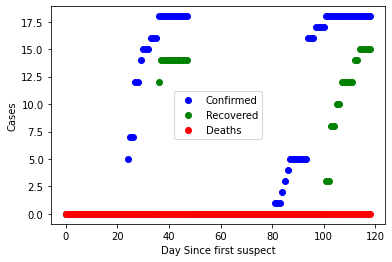

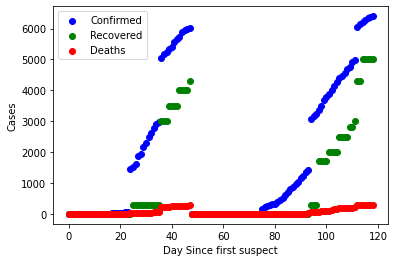

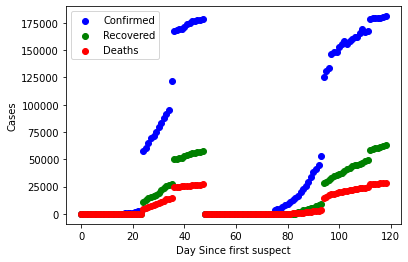

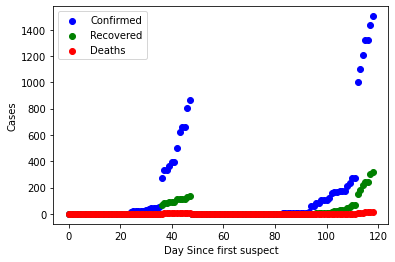

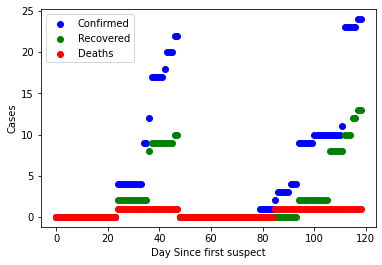

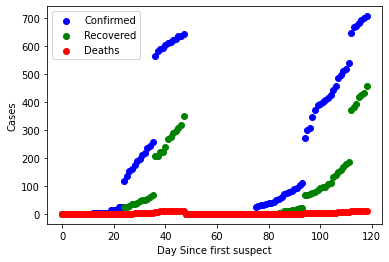

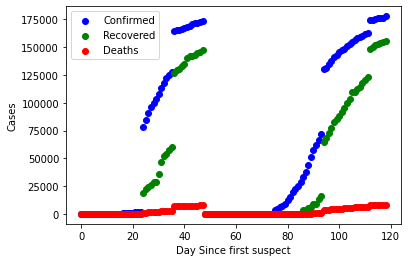

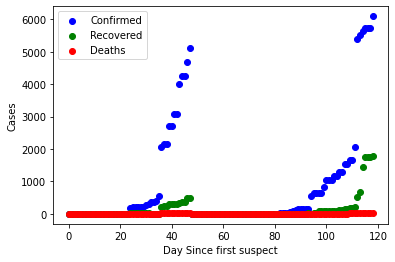

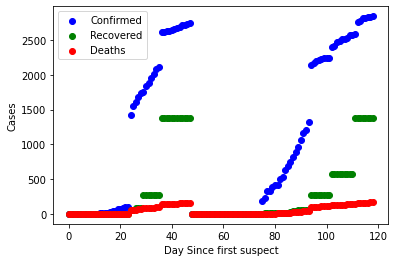

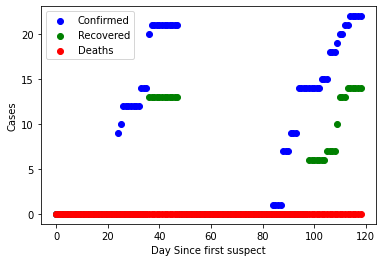

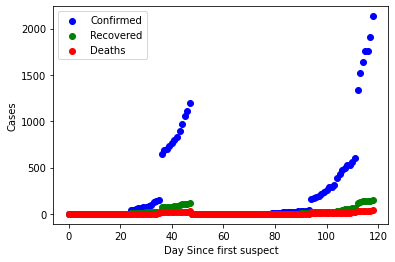

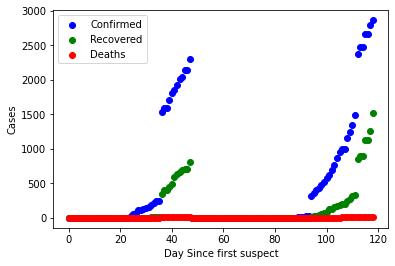

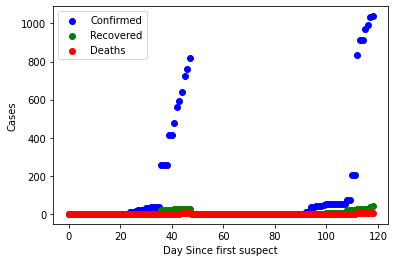

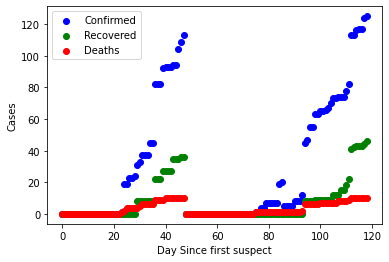

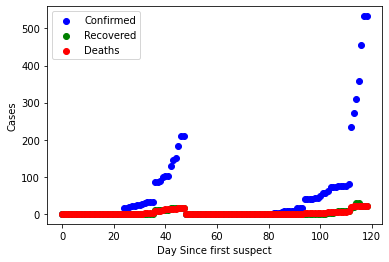

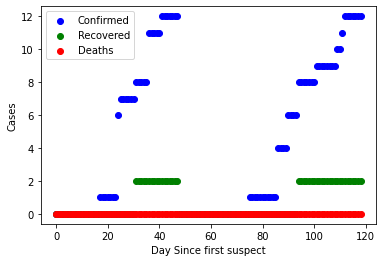

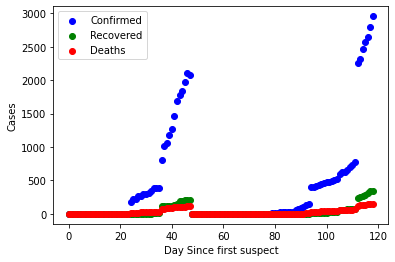

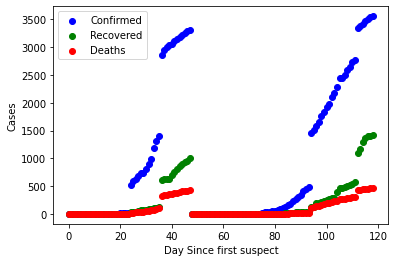

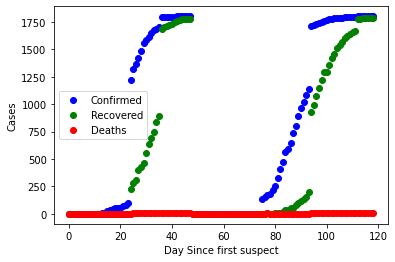

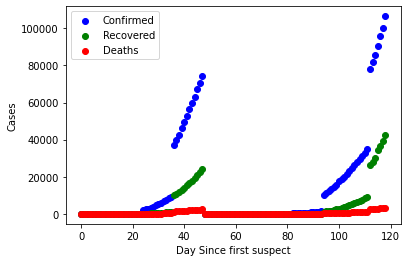

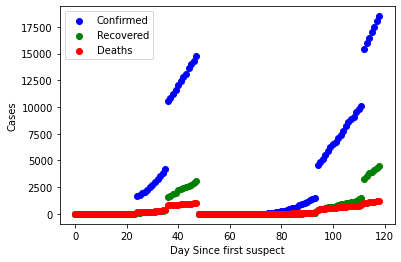

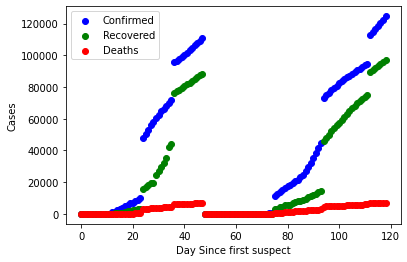

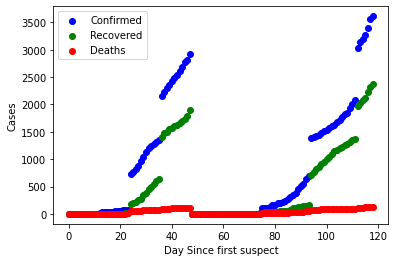

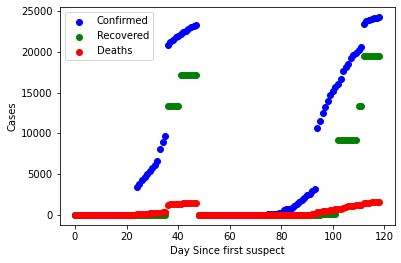

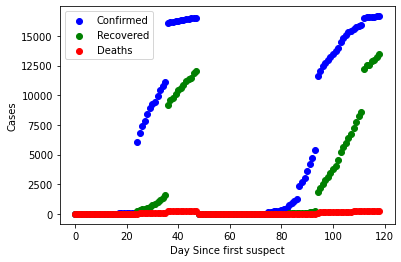

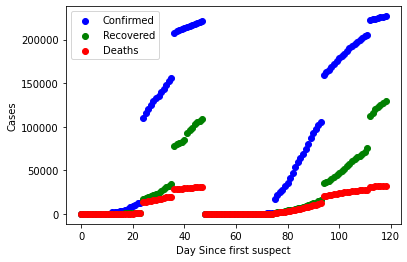

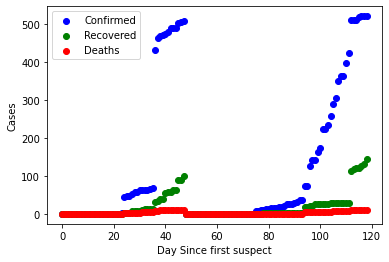

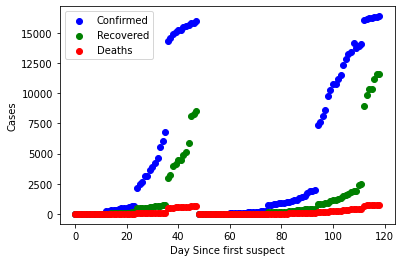

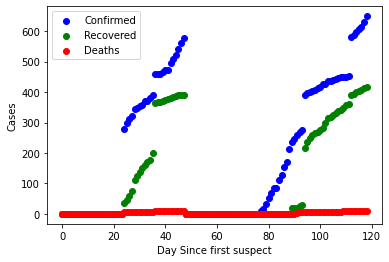

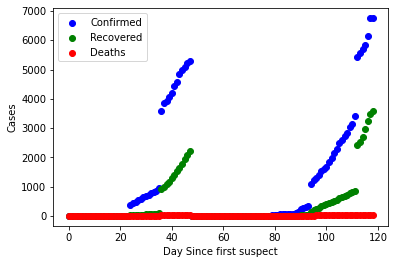

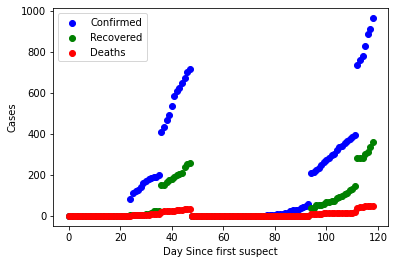

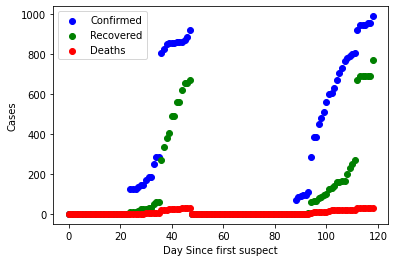

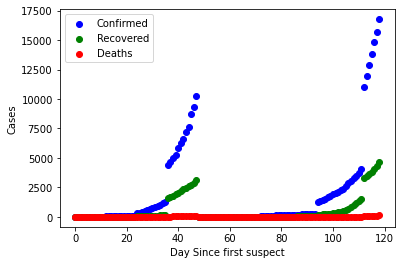

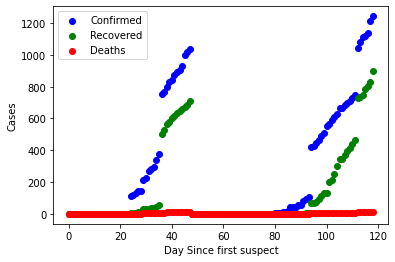

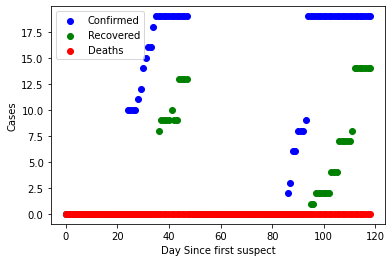

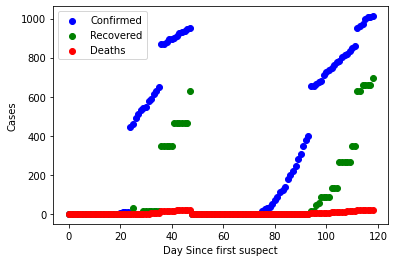

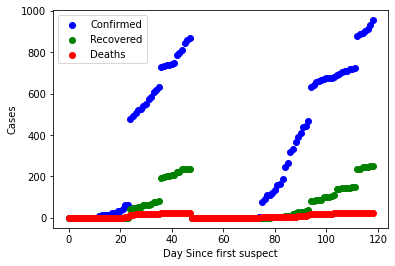

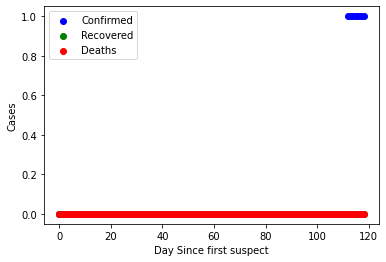

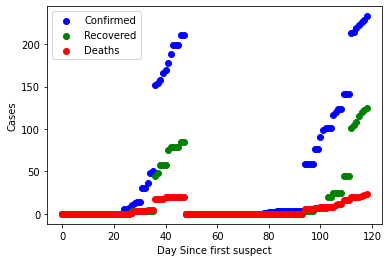

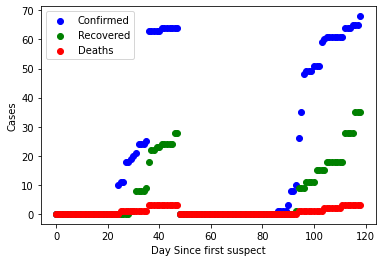

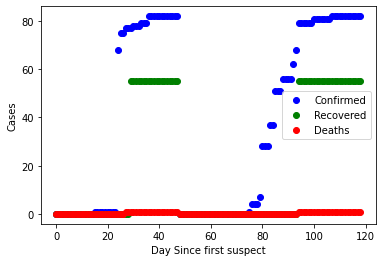

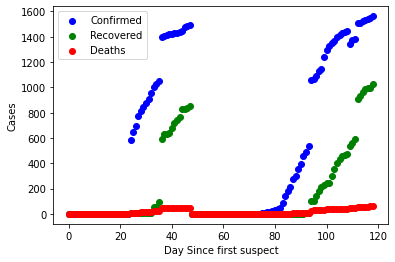

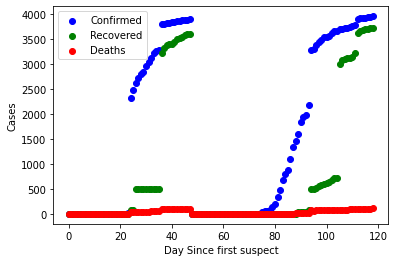

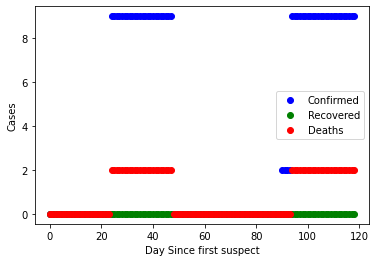

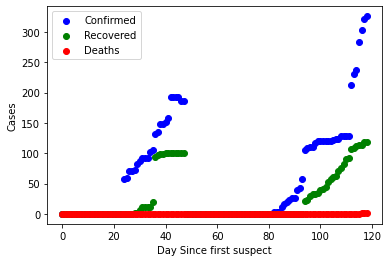

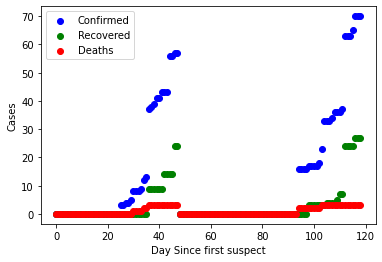

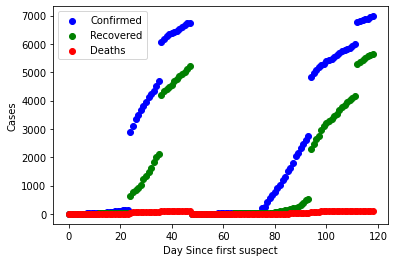

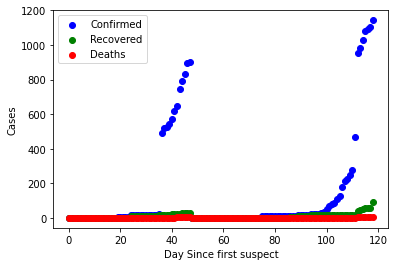

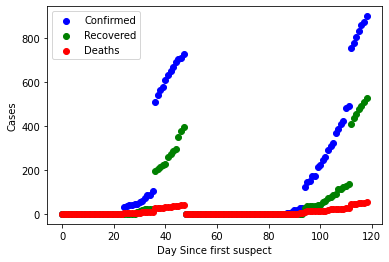

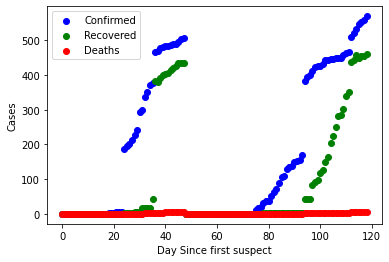

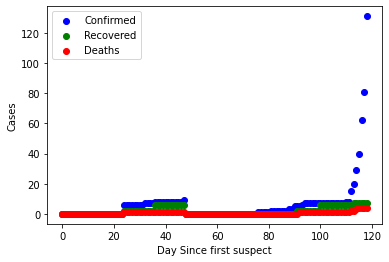

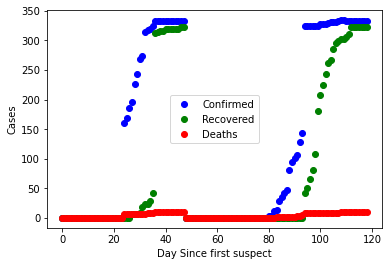

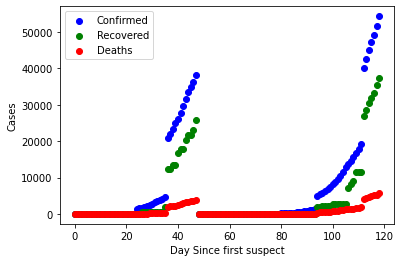

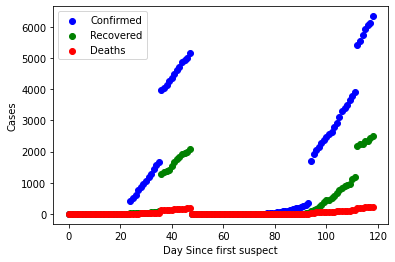

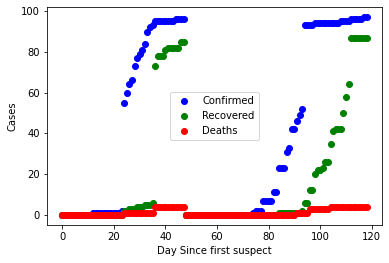

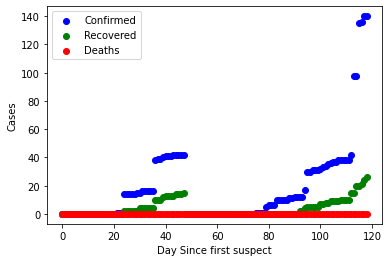

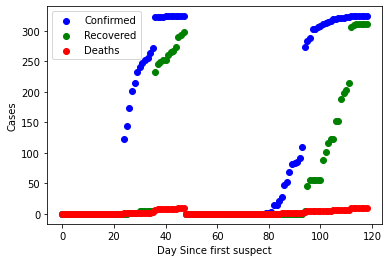

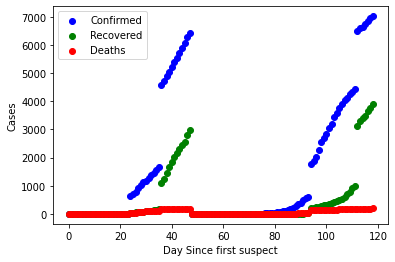

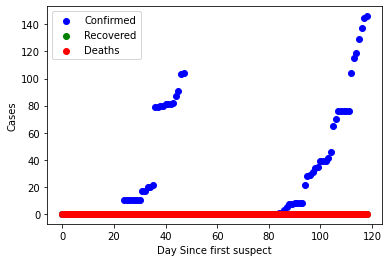

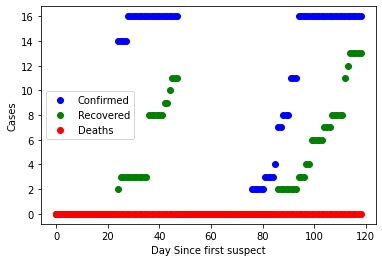

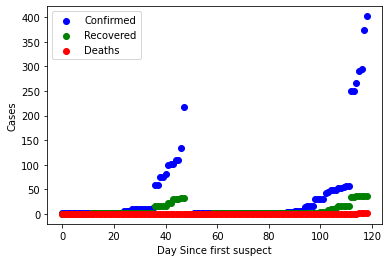

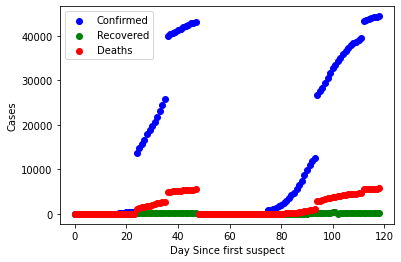

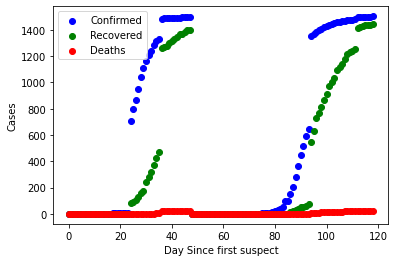

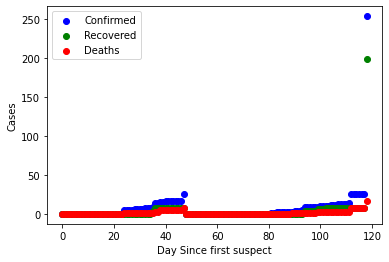

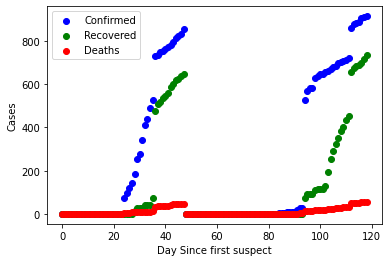

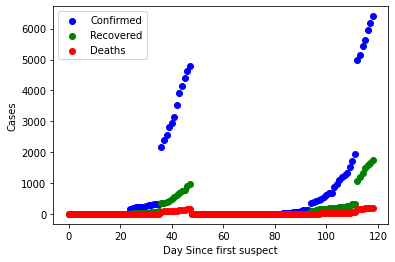

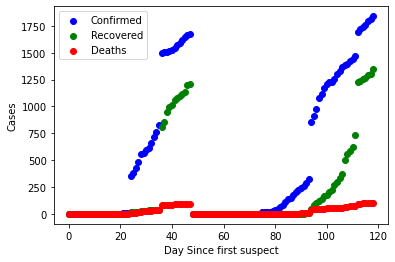

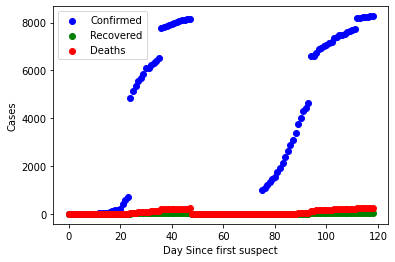

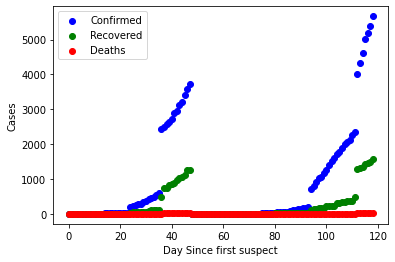

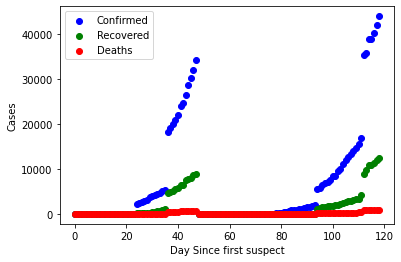

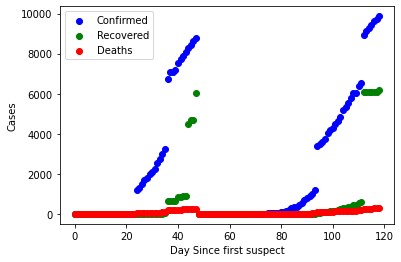

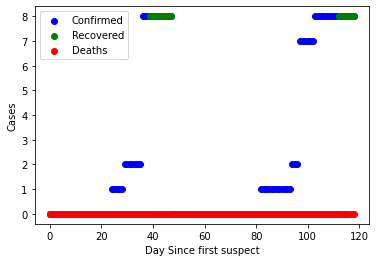

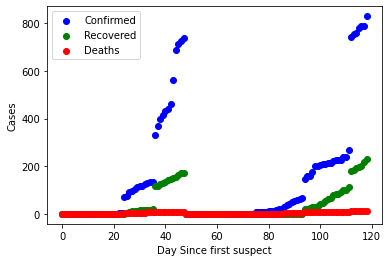

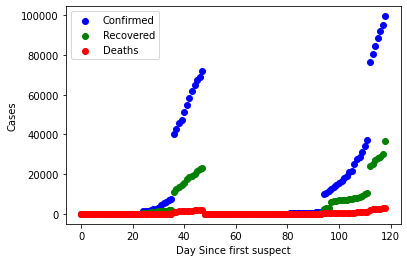

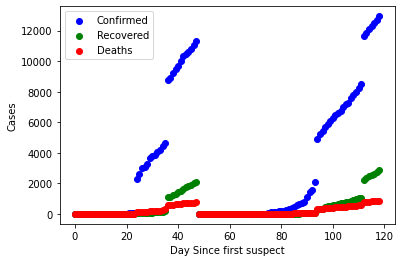

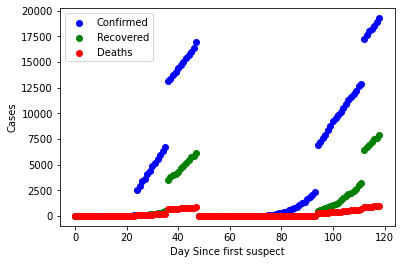

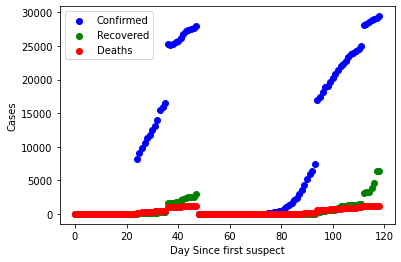

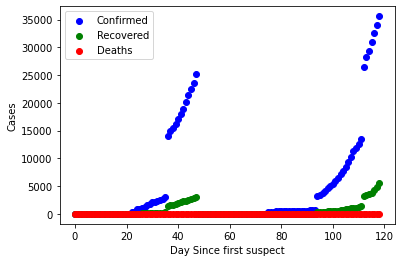

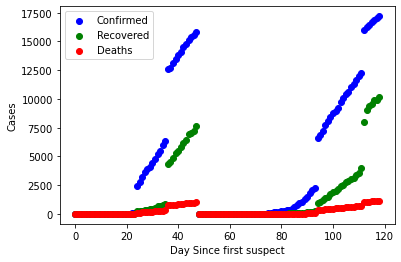

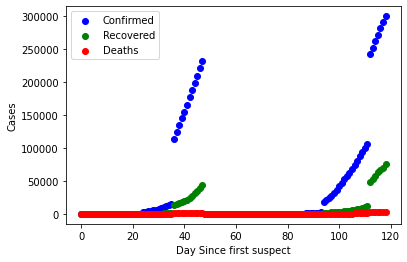

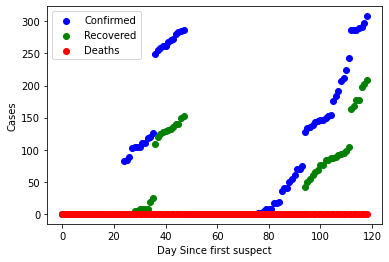

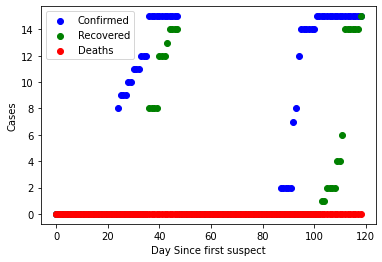

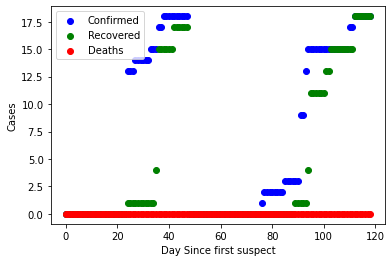

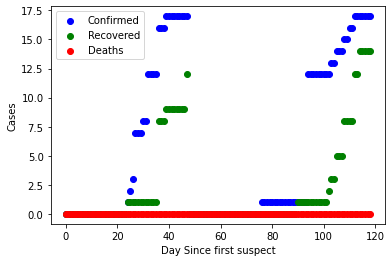

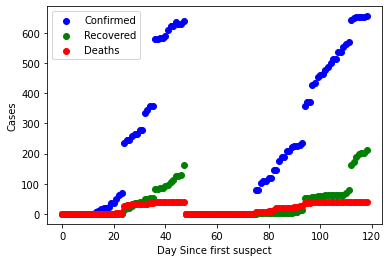

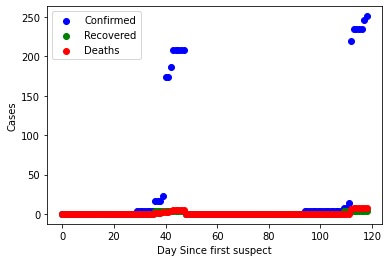

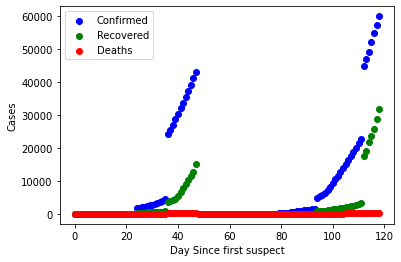

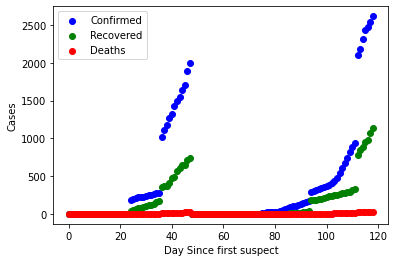

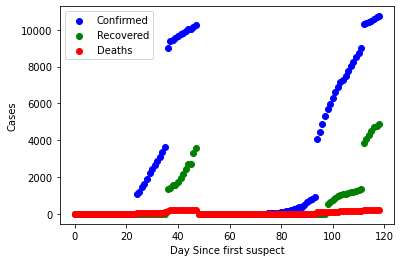

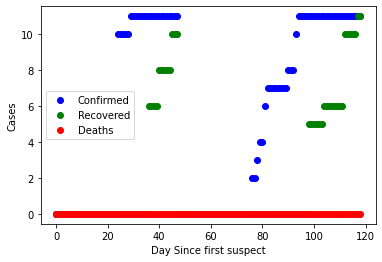

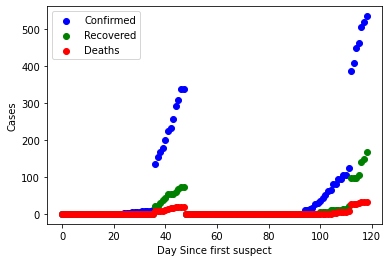

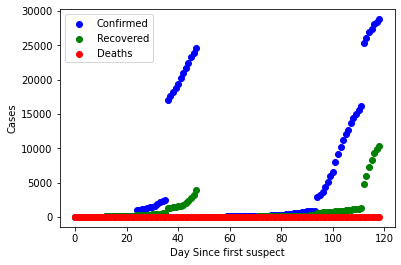

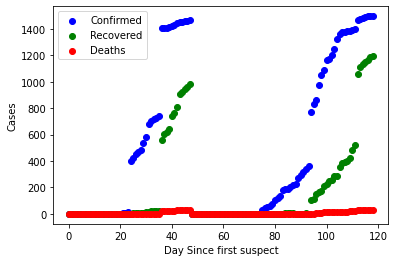

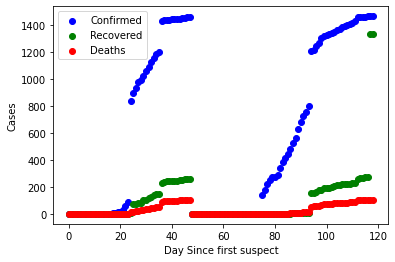

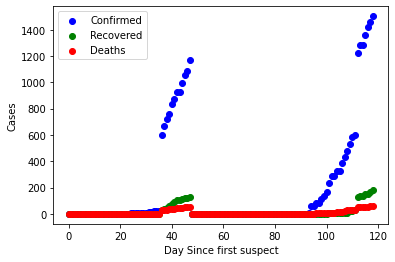

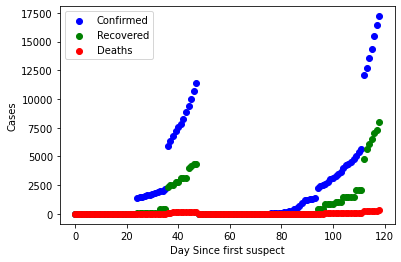

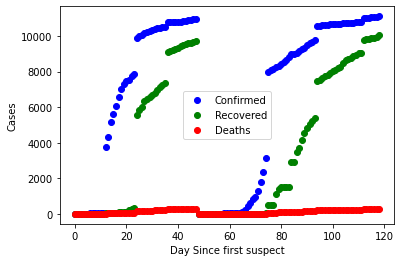

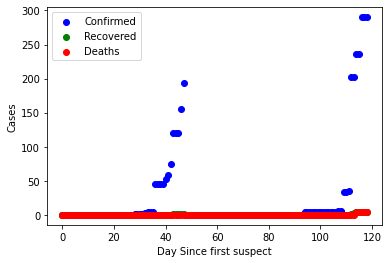

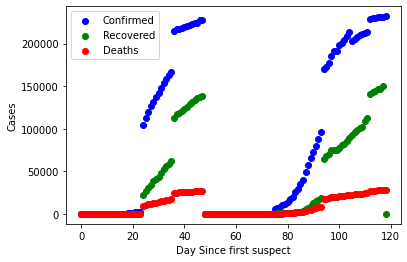

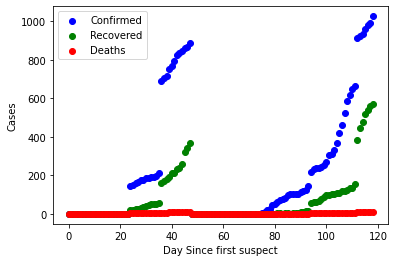

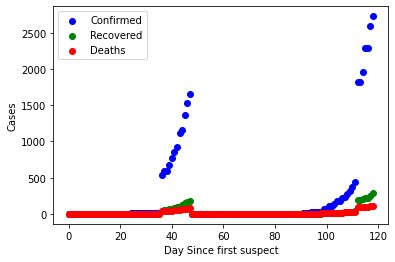

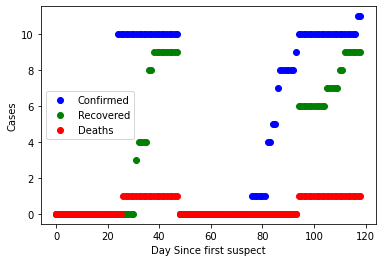

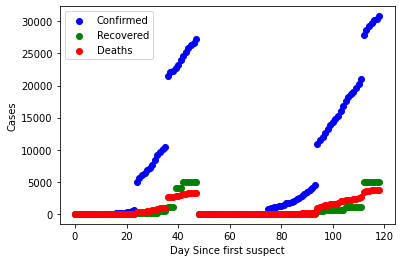

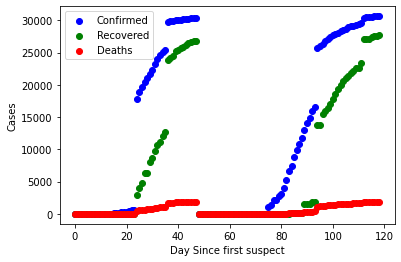

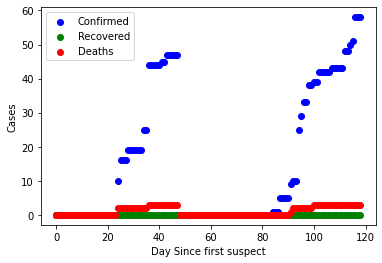

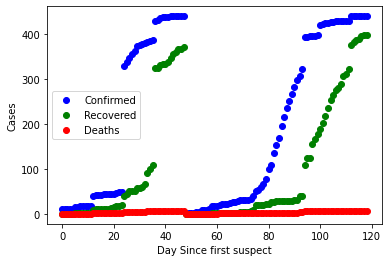

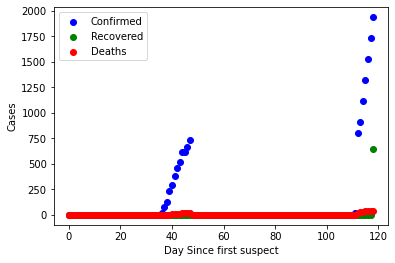

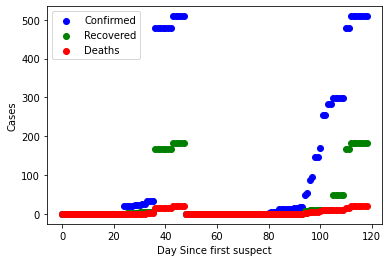

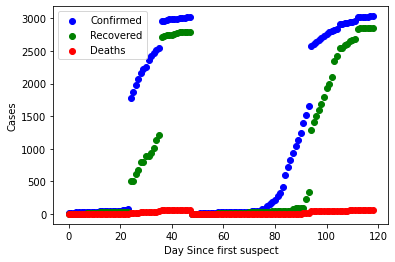

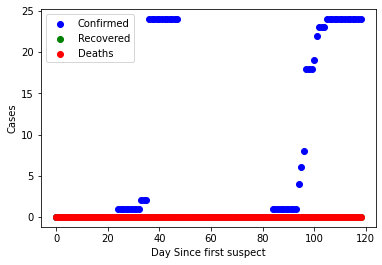

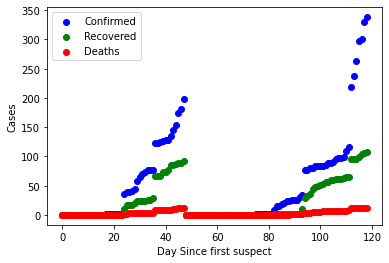

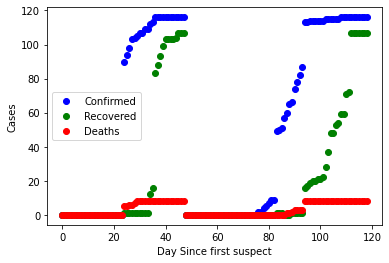

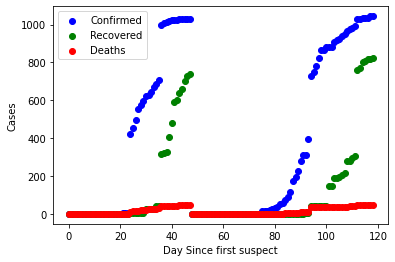

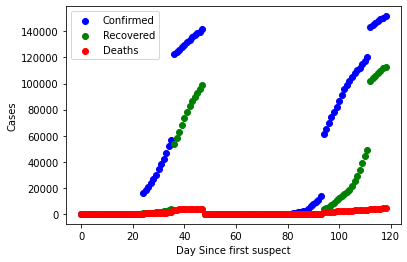

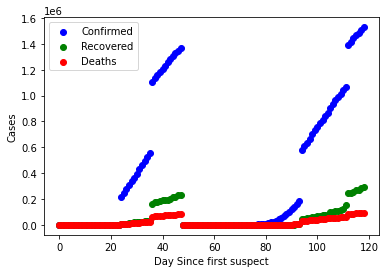

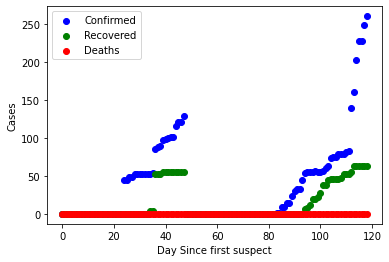

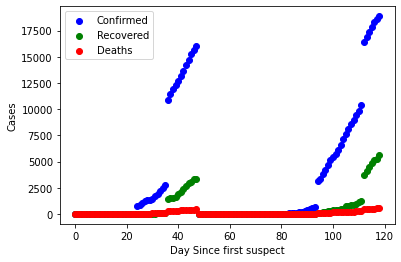

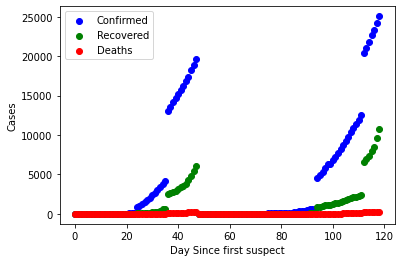

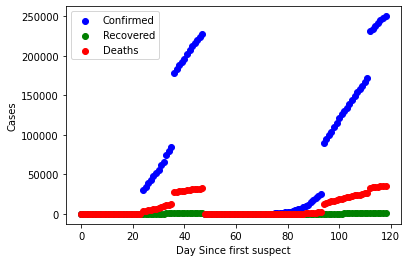

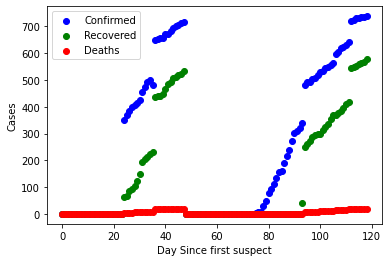

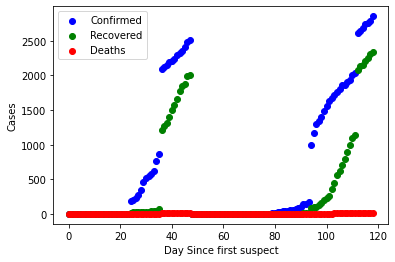

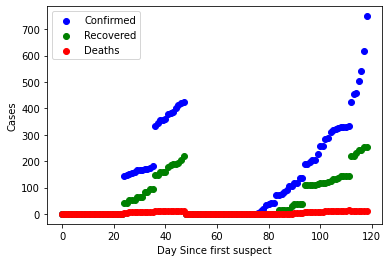

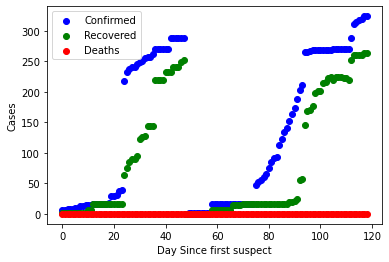

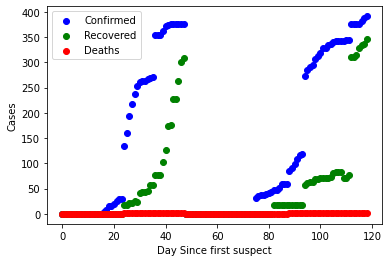

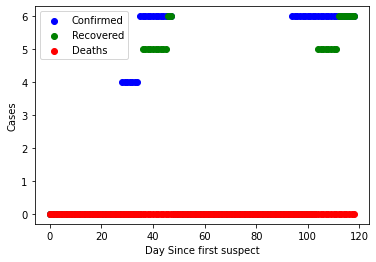

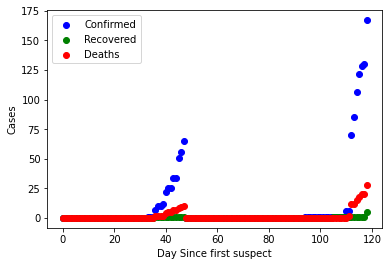

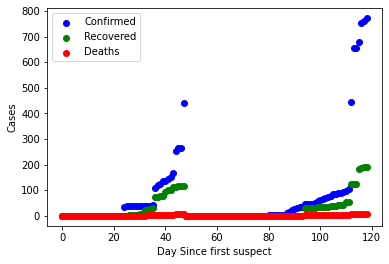

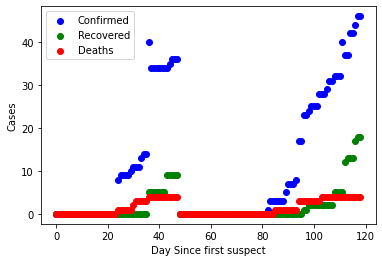

In [64]:
for i in range(0,len(total_countries)):
  C=df3[df3["Country/Region"]==total_countries[i]].reset_index()
  plt.scatter(np.arange(0,len(C)),C['Confirmed'],color="blue",label="Confirmed")
  plt.scatter(np.arange(0,len(C)),C['Recovered'],color="green",label="Recovered")
  plt.scatter(np.arange(0,len(C)),C['Deaths'],color="red",label="Deaths")
  plt.xlabel("Day Since first suspect")
  plt.ylabel("Cases")
  plt.legend()
  plt.show()


In [65]:
df4= df3.groupby(['Date'])[['Date','Confirmed','Deaths','Recovered']].sum().reset_index()

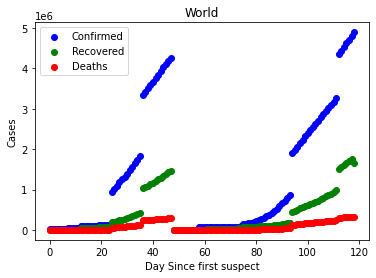

In [66]:
  C=df4
  plt.scatter(np.arange(0,len(C)),C['Confirmed'],color="blue",label="Confirmed")
  plt.scatter(np.arange(0,len(C)),C['Recovered'],color="green",label="Recovered")
  plt.scatter(np.arange(0,len(C)),C['Deaths'],color="red",label="Deaths")
  plt.title('World')
  plt.xlabel("Day Since first suspect")
  plt.ylabel("Cases")
  plt.legend()
  plt.show()
